In [43]:
import numpy as np
import matplotlib.pyplot as plt
import sciann as sn
sn.set_random_seed(12134)

Source: https://www.youtube.com/watch?v=wd2orAbPkoM 

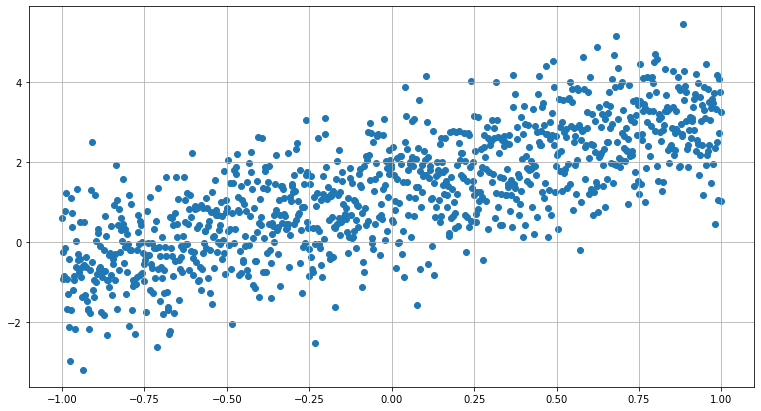

In [44]:
x_data = np.linspace(-1,1,1000)
y_data = 2*x_data + 1
y_data += 0.2*np.std(y_data) + np.random.randn(1000)

plt.figure(figsize=(13,7))
plt.scatter(x_data,y_data)
plt.grid()

# Linear regression - purely data driven

In [45]:
x = sn.Variable('x') # independent variable
y = sn.Functional('y',variables=x) # Equivalent to linear regression since I didn't specify any hidden layers

In [46]:
yhat = y.eval(x_data)

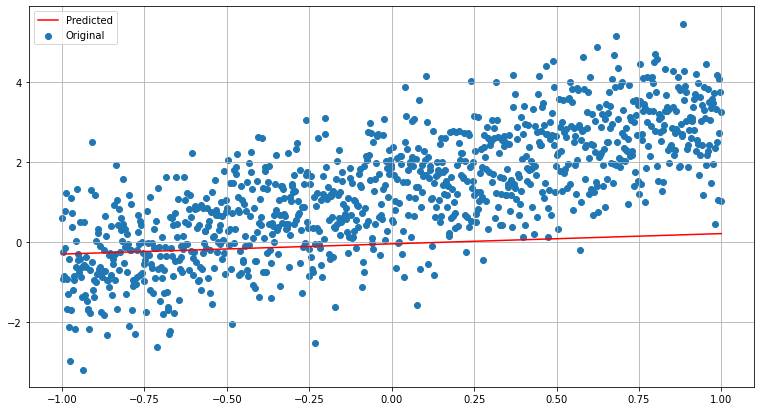

In [47]:
plt.figure(figsize=(13,7))
plt.scatter(x_data,y_data,label='Original')
plt.plot(x_data,yhat,label='Predicted',color='red')
plt.grid()
plt.legend()

In [48]:
y.get_weights()

[[array([[0.25607765]], dtype=float32), array([-0.04929533], dtype=float32)]]

# Neural network - purely data driven

In [49]:
# SciModel is similar to Keras.Model

m = sn.SciModel(inputs=x,
                targets=y,
                loss_func='mse',
                optimizer='adam')

In [50]:
m.train(x_data,
        y_data,
        learning_rate=0.01,
        epochs=100)


Total samples: 1000 
Batch size: 64 
Total batches: 16 

Epoch 1/100
16/16 [==============================] - 0s 3ms/step - batch: 7.5000 - size: 62.5000 - loss: 3.4355 - lr: 0.0100 - time: 0.4290
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - batch: 7.5000 - size: 62.5000 - loss: 2.8936 - lr: 0.0100 - time: 0.0980
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - batch: 7.5000 - size: 62.5000 - loss: 2.4625 - lr: 0.0100 - time: 0.1210
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - batch: 7.5000 - size: 62.5000 - loss: 2.0849 - lr: 0.0100 - time: 0.1267
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - batch: 7.5000 - size: 62.5000 - loss: 1.8189 - lr: 0.0100 - time: 0.1230
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - batch: 7.5000 - size: 62.5000 - loss: 1.5759 - lr: 0.0100 - time: 0.1236
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - batch: 7.5000 - size: 62.5000 - los

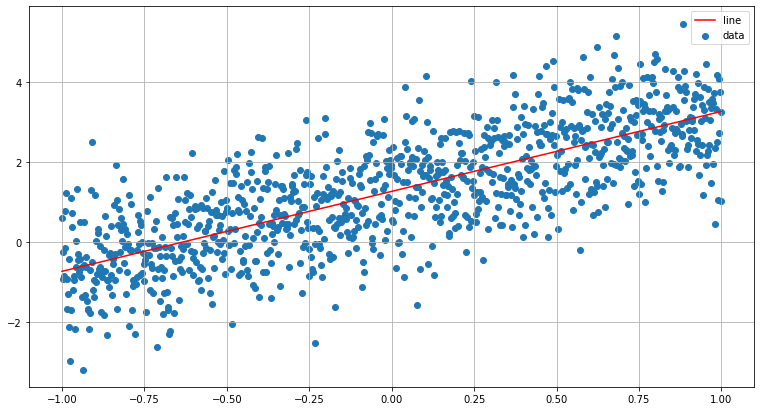

In [51]:
plt.figure(figsize=(13,7))
plt.scatter(x_data,y_data,label='data')
plt.plot(x_data,y.eval(x_data),label='line',color='red')
plt.grid()
plt.legend()

In [52]:
y.get_weights() # Similar to 2x+1

[[array([[1.9992272]], dtype=float32), array([1.2625643], dtype=float32)]]

# Quadratic regression 

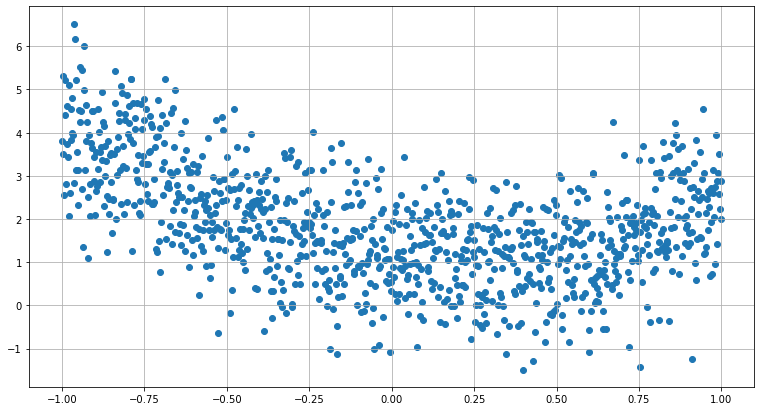

In [53]:
x_data = np.linspace(-1,1,1000)
y_data = 2*x_data**2 -x_data + 1
y_data += 0.2*np.std(y_data) + np.random.randn(1000)

plt.figure(figsize=(13,7))
plt.scatter(x_data,y_data)
plt.grid()

In [54]:
x = sn.Variable('x') # independent variable
y = sn.Functional('y',variables=[x,x**2]) # Equivalent to linear regression since I didn't specify any hidden layers

In [55]:
y.get_weights() # Now we have two weights for x and x**2

[[array([[-0.97532505],
         [-0.43672264]], dtype=float32),
  array([0.02633766], dtype=float32)]]

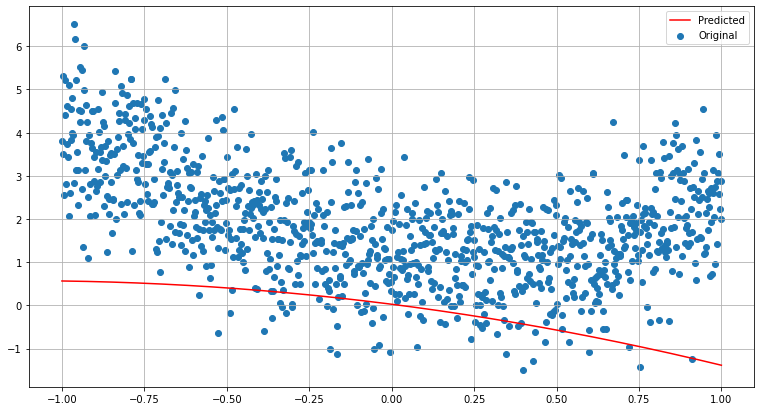

In [56]:
plt.figure(figsize=(13,7)) # before training
plt.scatter(x_data,y_data,label='Original')
plt.plot(x_data,y.eval(x_data),label='Predicted',color='red')
plt.grid()
plt.legend()

In [57]:
# SciModel is similar to Keras.Model

m = sn.SciModel(inputs=x,
                targets=y,
                loss_func='mse',
                optimizer='adam')

m.train(x_data,
        y_data,
        learning_rate=0.01,
        epochs=100)


Total samples: 1000 
Batch size: 64 
Total batches: 16 

Epoch 1/100
16/16 [==============================] - 0s 2ms/step - batch: 7.5000 - size: 62.5000 - loss: 4.3148 - lr: 0.0100 - time: 0.1002
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - batch: 7.5000 - size: 62.5000 - loss: 3.6073 - lr: 0.0100 - time: 0.1517
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - batch: 7.5000 - size: 62.5000 - loss: 3.0411 - lr: 0.0100 - time: 0.1136
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - batch: 7.5000 - size: 62.5000 - loss: 2.5559 - lr: 0.0100 - time: 0.1336
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - batch: 7.5000 - size: 62.5000 - loss: 2.2072 - lr: 0.0100 - time: 0.1141
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - batch: 7.5000 - size: 62.5000 - loss: 1.9282 - lr: 0.0100 - time: 0.1253
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - batch: 7.5000 - size: 62.5000 - los

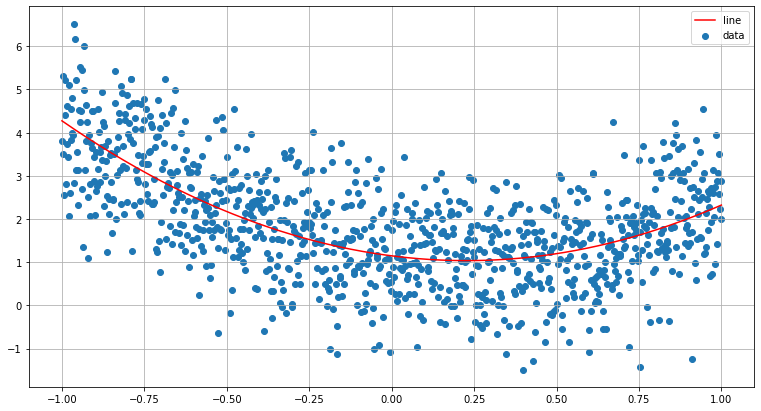

In [58]:
plt.figure(figsize=(13,7))
plt.scatter(x_data,y_data,label='data')
plt.plot(x_data,y.eval(x_data),label='line',color='red')
plt.grid()
plt.legend()

# Neural network 2d datasets

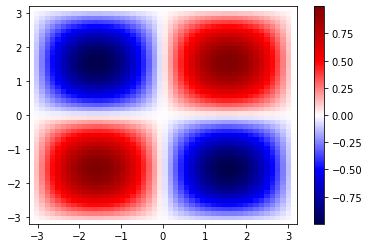

In [59]:
x_data, y_data = np.meshgrid(
    np.linspace(-np.pi,np.pi,50),
    np.linspace(-np.pi,np.pi,50)
)

f_data = np.sin(x_data)*np.sin(y_data)
plt.pcolor(x_data,y_data,f_data,cmap='seismic',shading='auto')
plt.colorbar()

In [60]:
x = sn.Variable('x')
y = sn.Variable('y')
f = sn.Functional('f',[x,y],hidden_layers=[10,10,10,10],activation='l-tanh') # neural network setup

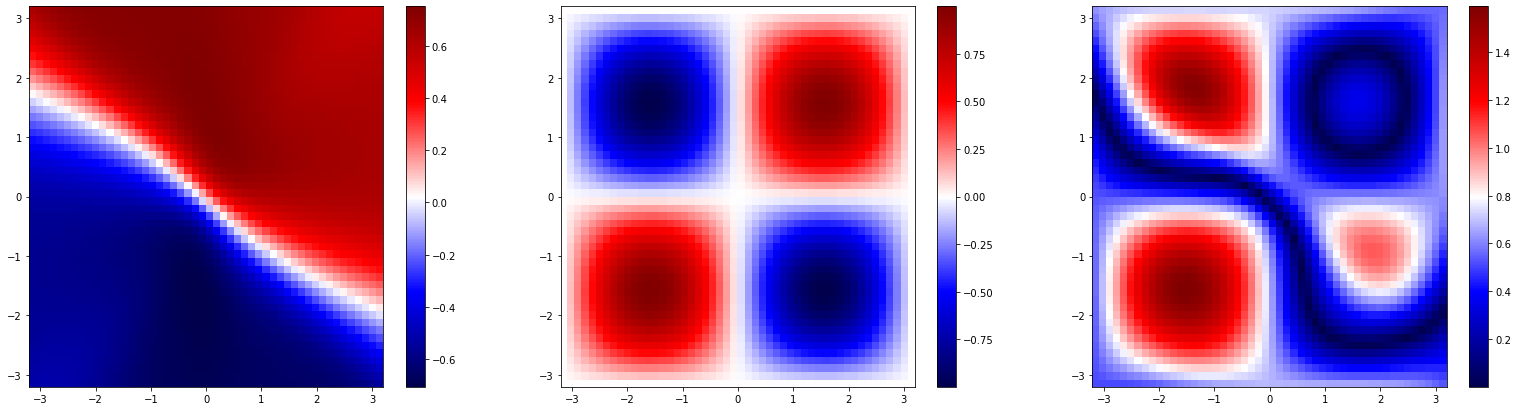

In [61]:
f_pred = f.eval([x_data,y_data])

plt.figure(figsize=(27,7))

plt.subplot(1,3,1)
im=plt.pcolor(x_data,y_data,f_pred,cmap='seismic',shading='auto')
plt.colorbar(im)

plt.subplot(1,3,2)
plt.pcolor(x_data,y_data,f_data,cmap='seismic',shading='auto')
plt.colorbar()

plt.subplot(1,3,3)
plt.pcolor(x_data,y_data,abs(f_data-f_pred),cmap='seismic',shading='auto') # absolute error
plt.colorbar()

In [62]:
f.get_weights()

[[array([[ 1.2038114 , -0.771686  ,  1.3756249 ,  0.07360917,  0.10774758,
           0.76439345,  0.23487858,  0.043335  ,  0.85702926, -0.939568  ],
         [ 1.2193403 , -1.234367  , -0.14133154,  0.5147775 ,  0.11174387,
          -0.26984024,  0.69376624,  0.8933957 , -0.9646383 ,  0.4872374 ]],
        dtype=float32),
  array([ 0.00815811, -0.01553246, -0.01629349,  0.03603529, -0.04084573,
          0.0227452 ,  0.01312811, -0.02924945, -0.00391394,  0.03423751],
        dtype=float32)],
 [array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)],
 [array([[-0.36918348,  0.04695981, -0.21904683,  0.0498911 ,  0.4438764 ,
          -0.4536669 ,  0.15500408,  0.09491277,  0.48859134, -0.45495892],
         [-0.3900683 ,  0.08133161, -0.23916556, -0.25731805, -0.18926208,
           0.0552016 ,  0.6260251 , -0.37154305, -0.17035727,  0.20315048],
         [-0.4463598 , -0.53142095,  0.44244862, -0.36042082, -0.10711471,
           0.46784207, -0.01360346, -0.01948352, -0.249

In [63]:
sn.get_bibliography()

@article{haghighat2021sciann,
    author = "Haghighat, Ehsan and Juanes, Ruben",
    title = "SciANN: A Keras/TensorFlow wrapper for scientific computations and physics-informed deep learning using artificial neural networks",
    journal = "Computer Methods in Applied Mechanics and Engineering",
    volume = "373",
    pages = "113552",
    year = "2021",
    publisher = "Elsevier",
    url = "https://www.sciencedirect.com/science/article/pii/S0045782520307374"
}

@article{raissi2019physics,
    author = "Raissi, Maziar and Perdikaris, Paris and Karniadakis, George E",
    title = "Physics-informed neural networks: A deep learning framework for solving forward and inverse problems involving nonlinear partial differential equations",
    journal = "Journal of Computational Physics",
    volume = "378",
    pages = "686--707",
    year = "2019",
    publisher = "Elsevier",
    url = "https://www.sciencedirect.com/science/article/pii/S0021999118307125"
}

@article{jagtap2020locally,
    

In [64]:
n = sn.SciModel([x,y],f,loss_func='mse',optimizer='adam',plot_to_file='network.png')

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [65]:
history = n.train([x_data,y_data],f_data,epochs=100,learning_rate=0.005)


Total samples: 2500 
Batch size: 64 
Total batches: 40 

Epoch 1/100
40/40 [==============================] - 0s 4ms/step - batch: 19.5000 - size: 62.5000 - loss: 0.0779 - lr: 0.0050 - time: 0.2180
Epoch 3/100
40/40 [==============================] - 0s 4ms/step - batch: 19.5000 - size: 62.5000 - loss: 0.0535 - lr: 0.0050 - time: 0.2370
Epoch 4/100
40/40 [==============================] - 0s 4ms/step - batch: 19.5000 - size: 62.5000 - loss: 0.0483 - lr: 0.0050 - time: 0.2130
Epoch 5/100
40/40 [==============================] - 0s 4ms/step - batch: 19.5000 - size: 62.5000 - loss: 0.0318 - lr: 0.0050 - time: 0.2150
Epoch 7/100
40/40 [==============================] - 0s 4ms/step - batch: 19.5000 - size: 62.5000 - loss: 0.0093 - lr: 0.0050 - time: 0.2430
Epoch 10/100
40/40 [==============================] - 0s 4ms/step - batch: 19.5000 - size: 62.5000 - loss: 0.0059 - lr: 0.0050 - time: 0.2270
Epoch 11/100
40/40 [==============================] - 0s 5ms/step - batch: 19.5000 - size: 62.5

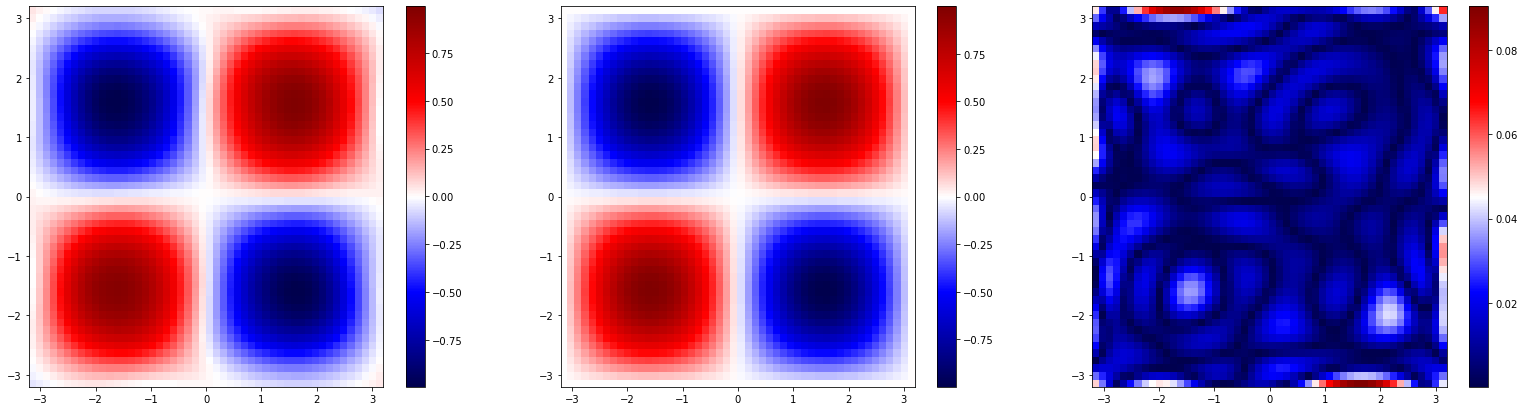

In [66]:
f_pred = f.eval([x_data,y_data]) # f is evaluated after training

plt.figure(figsize=(27,7))

plt.subplot(1,3,1)
im=plt.pcolor(x_data,y_data,f_pred,cmap='seismic',shading='auto')
plt.colorbar(im)

plt.subplot(1,3,2)
plt.pcolor(x_data,y_data,f_data,cmap='seismic',shading='auto')
plt.colorbar()

plt.subplot(1,3,3)
plt.pcolor(x_data,y_data,abs(f_data-f_pred),cmap='seismic',shading='auto') # absolute error
plt.colorbar()

In [67]:
n.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
x (InputLayer)                  [(None, 1)]          0                                            
__________________________________________________________________________________________________
y (InputLayer)                  [(None, 1)]          0                                            
__________________________________________________________________________________________________
concat_6 (Concatenate)          (None, 2)            0           x[0][0]                          
                                                                 y[0][0]                          
__________________________________________________________________________________________________
D10b_13 (Dense)                 (None, 10)           30          concat_6[0][0]             

# PINN

In [68]:
sn.reset_session()

x = sn.Variable('x')
y = sn.Variable('y')
f = sn.Functional('f',[x,y],hidden_layers=[10,10,10,10],activation='tanh') # neural network setup

L1 = sn.diff(f,x,order=2) + sn.diff(f,y,order=2) + 2*f # differential equation that is equal to np.sin(x_data)*np.sin(y_data)
L1 = sn.rename(L1,'L1')

m = sn.SciModel([x,y],[f,L1])

In [69]:
h = m.train([x_data,y_data],[f_data,np.zeros_like(f_data)],epochs=100,learning_rate=0.005)


Total samples: 2500 
Batch size: 64 
Total batches: 40 

Epoch 1/100
40/40 [==============================] - 2s 16ms/step - batch: 19.5000 - size: 62.5000 - loss: 0.4306 - f_loss: 0.2772 - L1_loss: 0.1533 - lr: 0.0050 - time: 1.7301
Epoch 2/100
40/40 [==============================] - 1s 16ms/step - batch: 19.5000 - size: 62.5000 - loss: 0.2078 - f_loss: 0.1893 - L1_loss: 0.0186 - lr: 0.0050 - time: 0.6780
Epoch 4/100
40/40 [==============================] - 1s 17ms/step - batch: 19.5000 - size: 62.5000 - loss: 0.1948 - f_loss: 0.1653 - L1_loss: 0.0295 - lr: 0.0050 - time: 0.7337
Epoch 5/100
40/40 [==============================] - 1s 17ms/step - batch: 19.5000 - size: 62.5000 - loss: 0.1823 - f_loss: 0.1443 - L1_loss: 0.0379 - lr: 0.0050 - time: 0.6901
Epoch 7/100
40/40 [==============================] - 1s 15ms/step - batch: 19.5000 - size: 62.5000 - loss: 0.1780 - f_loss: 0.1392 - L1_loss: 0.0388 - lr: 0.0050 - time: 0.6820
Epoch 8/100
40/40 [==============================] - 1s 1

In [70]:
h.history.keys()

dict_keys(['loss', 'f_loss', 'L1_loss', 'lr', 'time'])

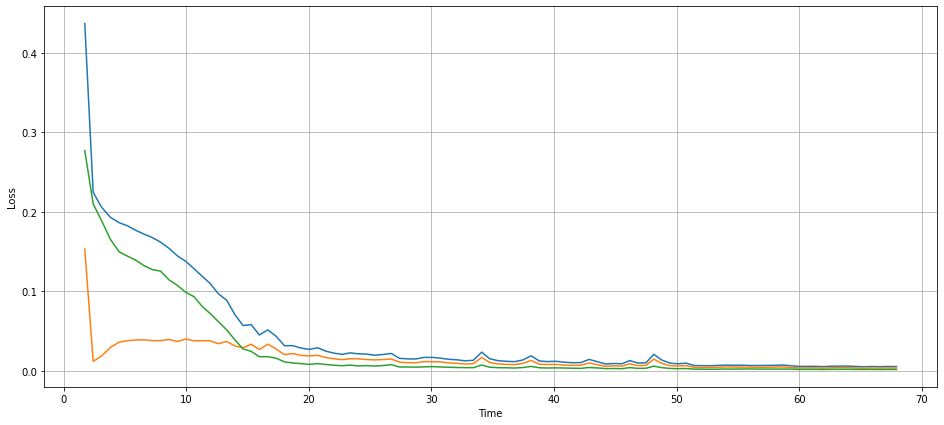

In [71]:
plt.figure(figsize=(16,7))

time = np.cumsum(h.history['time'])

plt.plot(time,h.history['loss'])
plt.plot(time,h.history['L1_loss'])
plt.plot(time,h.history['f_loss'])

plt.xlabel('Time')
plt.ylabel('Loss')
plt.grid()

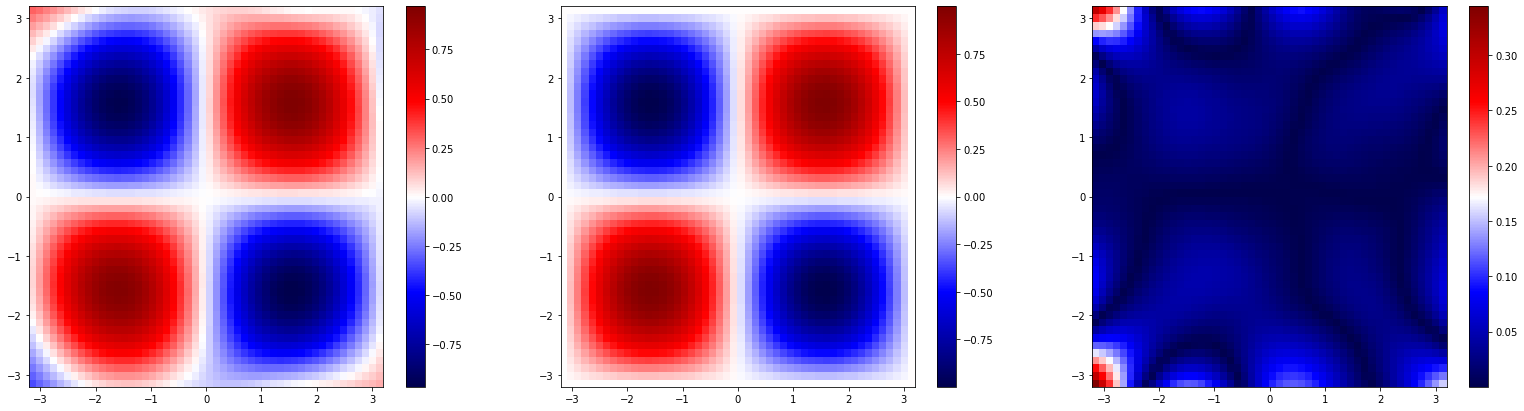

In [72]:
plt.figure(figsize=(27,7))

plt.subplot(1,3,1)
f_pred = f.eval([x_data,y_data]) 
im=plt.pcolor(x_data,y_data,f_pred,cmap='seismic',shading='auto')
plt.colorbar(im)

plt.subplot(1,3,2)
plt.pcolor(x_data,y_data,f_data,cmap='seismic',shading='auto')
plt.colorbar()

plt.subplot(1,3,3)
plt.pcolor(x_data,y_data,abs(f_data-f_pred),cmap='seismic',shading='auto') # absolute error
plt.colorbar()

# Data and physics with separate grids

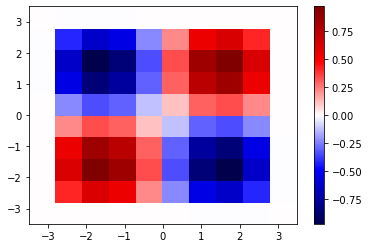

In [73]:
x_data, y_data = np.meshgrid( # neural network grid
    np.linspace(-np.pi,np.pi,10),
    np.linspace(-np.pi,np.pi,10)
)

f_data = np.sin(x_data)*np.sin(y_data)
plt.pcolor(x_data,y_data,f_data,cmap='seismic',shading='auto')
plt.colorbar()

In [74]:
x_phys, y_phys = np.meshgrid(  # physics grid
    np.linspace(-np.pi,np.pi,20),
    np.linspace(-np.pi,np.pi,20)
)

In [75]:
x_phys.shape

(20, 20)

In [76]:
x_phys.reshape(-1,1).shape

(400, 1)

In [77]:
x_train = np.concatenate([x_data.reshape(-1,1),x_phys.reshape(-1,1)])
y_train = np.concatenate([y_data.reshape(-1,1),y_phys.reshape(-1,1)])
f_data2 = f_data.reshape(-1,1)

In [78]:
type(y_train)

numpy.ndarray

In [79]:
ids_data = np.arange(0,x_data.size)
ids_phys = np.arange(ids_data.size,x_train.size)

In [80]:
ids_data.size

100

In [81]:
ids_phys.size

400

In [82]:
#sn.reset_session()

x = sn.Variable('x')
y = sn.Variable('y')
f = sn.Functional('f',[x,y],hidden_layers=[10,10,10,10],activation='tanh') # neural network setup

L1 = sn.diff(f,x,order=2) + sn.diff(f,y,order=2) + 2*f # differential equation that is equal to np.sin(x_data)*np.sin(y_data)
L1 = sn.rename(L1,'L1')

m = sn.SciModel([x,y],[f,L1],loss_func='mse',optimizer='adam')

In [83]:
h = m.train([x_train,y_train],
            [(ids_data,f_data2),(ids_phys,'zeros')],
            epochs=100,
            learning_rate=0.005,
            adaptive_weights=True) # Do one thing for ids_data and another for ids_phys


Total samples: 500 
Batch size: 64 
Total batches: 8 

6.818536043167114

+ adaptive_weights at epoch 1: [1.7905679494917734, 0.20943205050822655]
Epoch 1/100
8/8 [==============================]

TypeError: unsupported operand type(s) for /: 'list' and 'int'

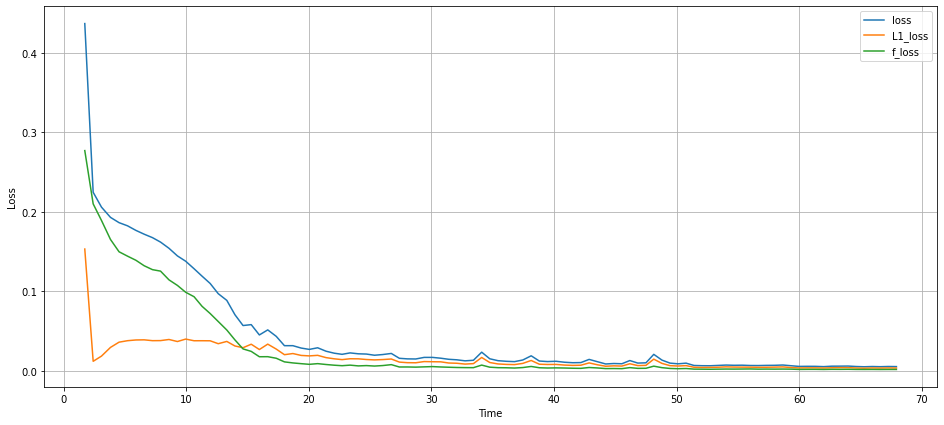

In [84]:
plt.figure(figsize=(16,7))

time = np.cumsum(h.history['time'])

plt.plot(time,h.history['loss'],label='loss')
plt.plot(time,h.history['L1_loss'],label='L1_loss')
plt.plot(time,h.history['f_loss'],label='f_loss')

plt.xlabel('Time')
plt.ylabel('Loss')
plt.legend()
plt.grid()

In [85]:
x_test, y_test = np.meshgrid(  # physics grid
    np.linspace(-np.pi,np.pi,100),
    np.linspace(-np.pi,np.pi,100)
)

f_test = np.sin(x_test)*np.sin(y_test)